In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_refeicao = pd.read_csv('/content/drive/MyDrive/dadosRefeicao.csv')
df_satisfacao = pd.read_csv('/content/drive/MyDrive/dadosCurso.csv')

In [ ]:
df_refeicao.head()

,Turno,Refeição
0,Manhã,Tradicional
1,Manhã,Light
2,Manhã,Vegetariana
3,Manhã,Tradicional
4,Manhã,Tradicional


In [ ]:
df_satisfacao.head()

,Curso,Satisfacao
0,Letras,2
1,Letras,5
2,Letras,3
3,Letras,2
4,Letras,1


# **Exercício 1:**

Uma empresa com funcionários distribuídos em dois turnos (Manhã e Noite), está interessada em verificar se existe uma associação entre o turno de trabalho e o tipo de refeição preferida no refeitório da empresa.

H₀: O turno é independente da refeição preferida.

H₁: O turno é associado à refeição preferida.

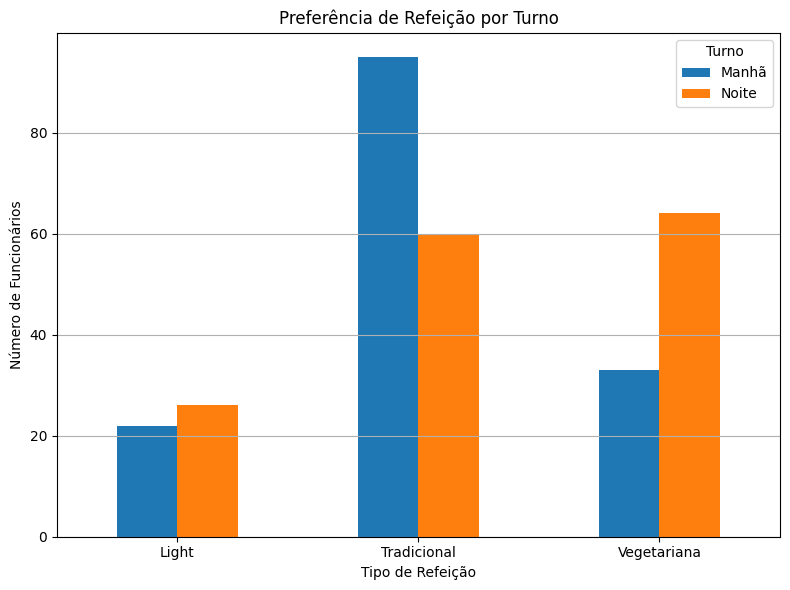

Tabela de Contingência - Preferência por Refeição:


Refeição,Light,Tradicional,Vegetariana
Turno,,,
Manhã,22,95,33
Noite,26,60,64



Teste Qui-Quadrado - Associação entre Turno e Refeição:
-> Estatística Qui-Quadrado: 18.14
-> Grau de Liberdade: 2
-> Valor-p: 0.000115
-> Conclusão: Rejeita H₀: Existe associação entre turno e tipo de refeição.


In [ ]:
# Tabela de contingência
cont_refeicao = pd.crosstab(df_refeicao['Turno'], df_refeicao['Refeição'])

# Teste Qui-quadrado
chi2_ref, p_ref, dof_ref, expected_ref = chi2_contingency(cont_refeicao)

# Gráfico da distribuição
cont_refeicao.T.plot(kind='bar', figsize=(8, 6))
plt.title("Preferência de Refeição por Turno")
plt.ylabel("Número de Funcionários")
plt.xlabel("Tipo de Refeição")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Resultado
# Tabela de contingência - Refeição
print("Tabela de Contingência - Preferência por Refeição:")
display(cont_refeicao)

# Resultado do teste qui-quadrado - Refeição
print("\nTeste Qui-Quadrado - Associação entre Turno e Refeição:")
print(f"-> Estatística Qui-Quadrado: {chi2_ref:.2f}")
print(f"-> Grau de Liberdade: {dof_ref}")
print(f"-> Valor-p: {p_ref:.6f}")

conclusao_ref = "Rejeita H₀: Existe associação entre turno e tipo de refeição." \
    if p_ref < 0.05 else "Não rejeita H₀: Sem evidência de associação entre turno e tipo de refeição."
print("-> Conclusão:", conclusao_ref)

# **Exercício 2:**

Nivel de satisfação com ensino remoto por curso.

H₀: O curso é independente do nível de satisfação.

H₁: O curso está associado ao nível de satisfação.

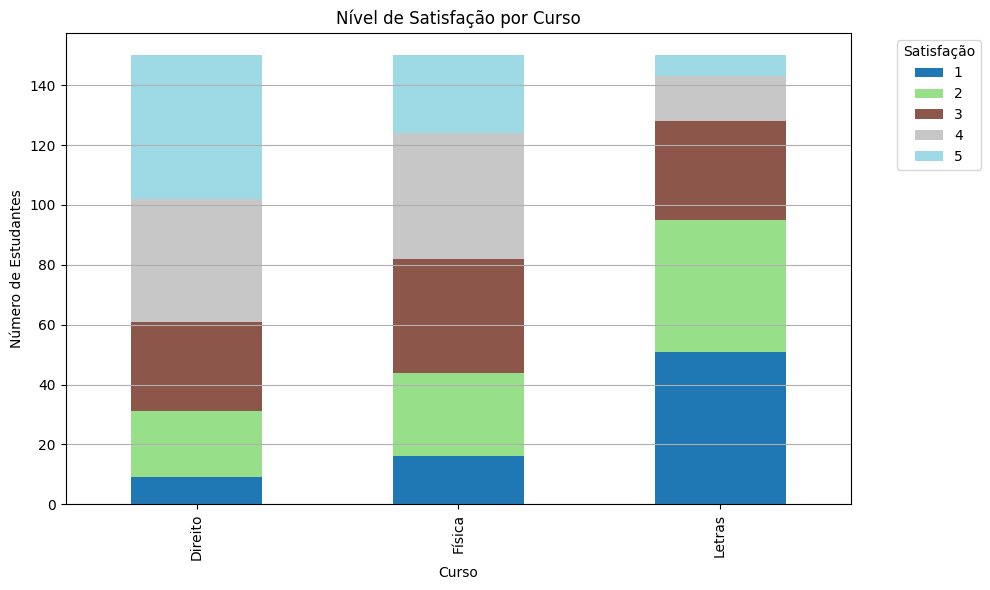



Tabela de Contingência - Nível de Satisfação por Curso:


Satisfacao,1,2,3,4,5
Curso,,,,,
Direito,9,22,30,41,48
Física,16,28,38,42,26
Letras,51,44,33,15,7



Teste Qui-Quadrado - Associação entre Curso e Satisfação:
-> Estatística Qui-Quadrado: 94.73
-> Grau de Liberdade: 8
-> Valor-p: 5.074092e-17
-> Conclusão: Rejeita H₀: O nível de satisfação depende do curso.


In [ ]:
# Tabela de contingência
cont_satisfacao = pd.crosstab(df_satisfacao['Curso'], df_satisfacao['Satisfacao'])

# Teste Qui-quadrado
chi2_sat, p_sat, dof_sat, expected_sat = chi2_contingency(cont_satisfacao)

# Gráfico da distribuição
cont_satisfacao.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Nível de Satisfação por Curso")
plt.ylabel("Número de Estudantes")
plt.xlabel("Curso")
plt.legend(title="Satisfação", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Tabela de contingência - Satisfação
print("\n\nTabela de Contingência - Nível de Satisfação por Curso:")
display(cont_satisfacao)

# Resultado do teste qui-quadrado - Satisfação
print("\nTeste Qui-Quadrado - Associação entre Curso e Satisfação:")
print(f"-> Estatística Qui-Quadrado: {chi2_sat:.2f}")
print(f"-> Grau de Liberdade: {dof_sat}")
print(f"-> Valor-p: {p_sat:.6e}")

conclusao_sat = "Rejeita H₀: O nível de satisfação depende do curso." \
    if p_sat < 0.05 else "Não rejeita H₀: Sem evidência de que o nível de satisfação dependa do curso."
print("-> Conclusão:", conclusao_sat)